# What your Shoes say about you?

## Project description

The goal of this assignment is to predict people's personalities by looking at images of their shoes. For the purpose of this assignment, various shoe types will be assigned to different personality types. This includes the following:
 - Slipper flats -> Laid back
 - Athletic and flat sandals -> Laid back
 - Knee High, Mid-Calf, and Over the Knee Boots -> Take charge
 - Ankle Boots -> Always looking ahead
 - Heels -> Self-confident
 - Sneakers -> Get along with everyone

## Imports

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

2023-11-06 00:03:03.991670: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preprocessing

### Preprocessing the Training Set

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2) # Specify 20% for validation
training_set = train_datagen.flow_from_directory('./data/train/',
                                                 target_size=(64, 64),
                                                 batch_size=128,
                                                 class_mode='categorical',
                                                 subset='training')  # Specify that this is the training set
validation_set = train_datagen.flow_from_directory('./data/train/',
                                                   target_size=(64, 64),
                                                   batch_size=128,
                                                   class_mode='categorical',
                                                   subset='validation')  # Specify that this is the validation set

Found 24491 images belonging to 5 classes.
Found 6121 images belonging to 5 classes.


### Preprocessing the Test Set

In [34]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('./data/test/',
                                            target_size=(64, 64),
                                            batch_size=128,
                                            class_mode='categorical')

Found 7651 images belonging to 5 classes.


## Building the CNN Model

### Step 1 - Initialising the Model

In [4]:
model = tf.keras.models.Sequential()

### Step 2 - Adding First Convolution Layer 

In [5]:
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu', input_shape=[64, 64, 3]))

### Step 3 - Pooling the First Layer

In [6]:
model.add(tf.keras.layers.MaxPool2D(pool_size=4, strides=2))

### Step 4 - Adding a Second Convolutional Layer

In [7]:
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'))

### Step 5 - Pooling the Second Layer

In [8]:
model.add(tf.keras.layers.MaxPool2D(pool_size=4, strides=2))

### Step 6 - Flattening

In [9]:
model.add(tf.keras.layers.Flatten())

### Step 7 - Full Connection

In [10]:
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

### Step 8 - Output Layer

In [11]:
model.add(tf.keras.layers.Dense(units=5, activation='softmax')) # 5 classes

### Step 9 - Compiling the CNN

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='nadam',metrics=['accuracy'])

## Training the CNN and Evaluation

In [13]:
history = model.fit(x=training_set, validation_data=validation_set, epochs=5)

Epoch 1/5
192/192 [==============================] - 125s 640ms/step - loss: 0.7281 - accuracy: 0.7294 - val_loss: 0.4579 - val_accuracy: 0.8361
Epoch 2/5
192/192 [==============================] - 135s 704ms/step - loss: 0.4731 - accuracy: 0.8276 - val_loss: 0.3392 - val_accuracy: 0.8722
Epoch 3/5
192/192 [==============================] - 133s 694ms/step - loss: 0.4152 - accuracy: 0.8452 - val_loss: 0.3487 - val_accuracy: 0.8729
Epoch 4/5
192/192 [==============================] - 142s 740ms/step - loss: 0.3889 - accuracy: 0.8590 - val_loss: 0.3120 - val_accuracy: 0.8830
Epoch 5/5
192/192 [==============================] - 133s 692ms/step - loss: 0.3695 - accuracy: 0.8646 - val_loss: 0.2942 - val_accuracy: 0.8933


## Model Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


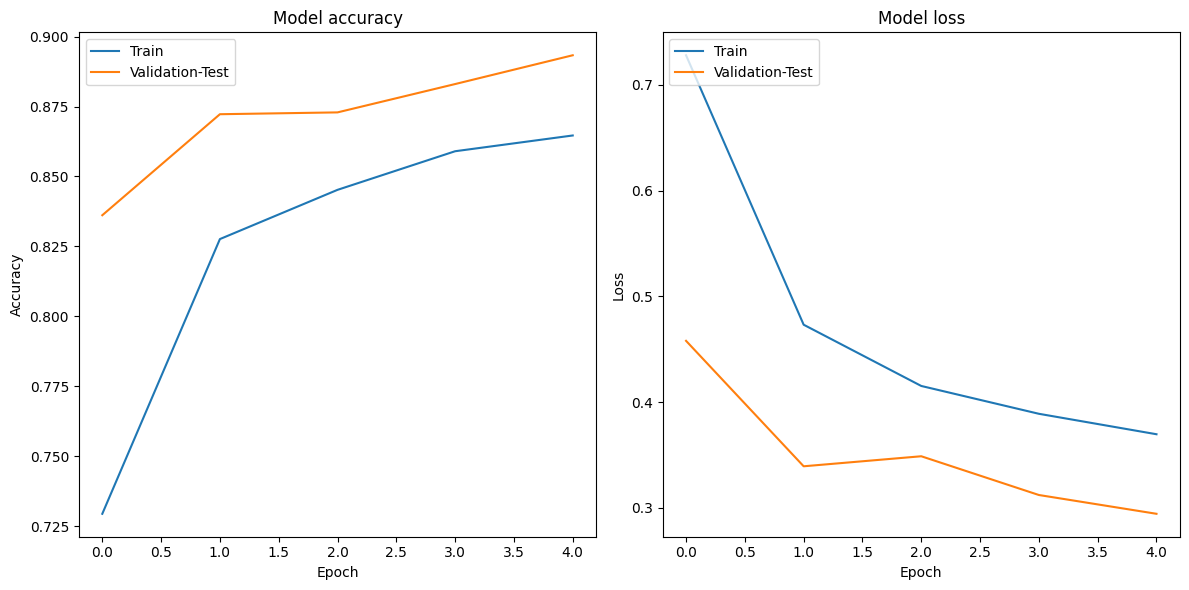

In [23]:
print(history.history.keys())
import matplotlib.pyplot as plt

# Plotting learning curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])  # Change 'accuracy' to 'acc'
plt.plot(history.history['val_accuracy'])  # Change 'val_accuracy' to 'val_acc'
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation-Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation-Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
test_accuracy = model.evaluate(test_set, verbose=2)
print(f'Test Accuracy: {test_accuracy[1]}')